In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, r'C:\Users\Admin\Documents\before_github\SymSC_Python_Norm2')
from Objects import JJ, Sine_current, Pulses, L,Ib, Square_pulse
from FunctionCompiler import *

In [140]:
L_clk_value = 1
J_e2_value = 50/125
J_clk_value = 1*0.25
J_3_value = 1.5

Ib_1_value = 1.5

J_upper_value = 1.5* 70/125
J_lower_value = 50/125
L_s_value = 22/2.4
J_e1_value = 50/125
J_4_value = 1
Ib_2_value = 1
J_5_value = 1

In [141]:
print(f"Через J_clk течет пост ток: {J_clk_value*Ib_1_value/(J_clk_value+J_3_value+J_e2_value)},\n"+ 
      f"через J_3: {J_3_value*Ib_1_value/(J_clk_value+J_3_value+J_e2_value)},\n"+
      f"через J_e2: {J_e2_value*Ib_1_value/(J_clk_value+J_3_value+J_e2_value)}")

Через J_clk течет пост ток: 0.1744186046511628,
через J_3: 1.0465116279069768,
через J_e2: 0.2790697674418605


In [181]:
L_clk = L.L(loc=[1,0],val=L_clk_value)
J_e2 = JJ.JJ(loc=[1,2],A=J_e2_value,c=1)
J_clk = JJ.JJ(loc=[2,0],A=J_clk_value,c=1)

l1 = L.L(loc=[2,3],val=1)
l2 = L.L(loc=[3,4],val=1)

J_3 = JJ.JJ(loc=[4,0],A=J_3_value,c=1)
Ib_1 = Ib.Ib(loc=[3],val=Ib_1_value)

J_upper = JJ.JJ(loc=[4,5],A=J_upper_value,c=1)
J_lower = JJ.JJ(loc=[5,0],A=J_lower_value,c=1)
L_s = L.L(loc=[5,6],val=L_s_value)
J_e1 = JJ.JJ(loc=[6,0],A=J_e1_value,c=1)

l3 = L.L(loc=[5,7],val=1)
J_4 = JJ.JJ(loc=[7,0],A=J_4_value,c=1)
l4 = L.L(loc=[7,8],val=1)

Ib_2 = Ib.Ib(loc=[8],val=Ib_2_value)
l5 = L.L(loc=[8,9],val=1)

J_5 = JJ.JJ(loc=[9,0],A=J_5_value,c=1)

In [182]:
tact_signal = Sine_current.Sine_current(loc=[1],t0=100, length=5000, w=0.05, A=2.5)
input_data_1 = Square_pulse.Square_pulse(loc=[5],t0=100+1*2*np.pi/0.05 - 2*np.pi/0.05/4, length=2*np.pi/0.05, A=0.7)

input_data_2 = Square_pulse.Square_pulse(loc=[5],t0=100+5*2*np.pi/0.05 - 2*np.pi/0.05/4, length=6*np.pi/0.05, A=0.7)

In [183]:
t = np.arange(0, 2000, 0.1)
fc = FunctionCompiler([L_clk,J_e2, J_clk, l1, l2, J_3, Ib_1, J_upper, J_lower, L_s, J_e1, l3, J_4, l4, Ib_2, l5, J_5, tact_signal, input_data_1, input_data_2],t)

sol = fc.solve()

Generated objects are: L1 JJ1 JJ2 L2 L3 JJ3 Ib1 JJ4 JJ5 L4 JJ6 L5 JJ7 L6 Ib2 L7 JJ8 Sine_current1 Square_pulse1 Square_pulse2


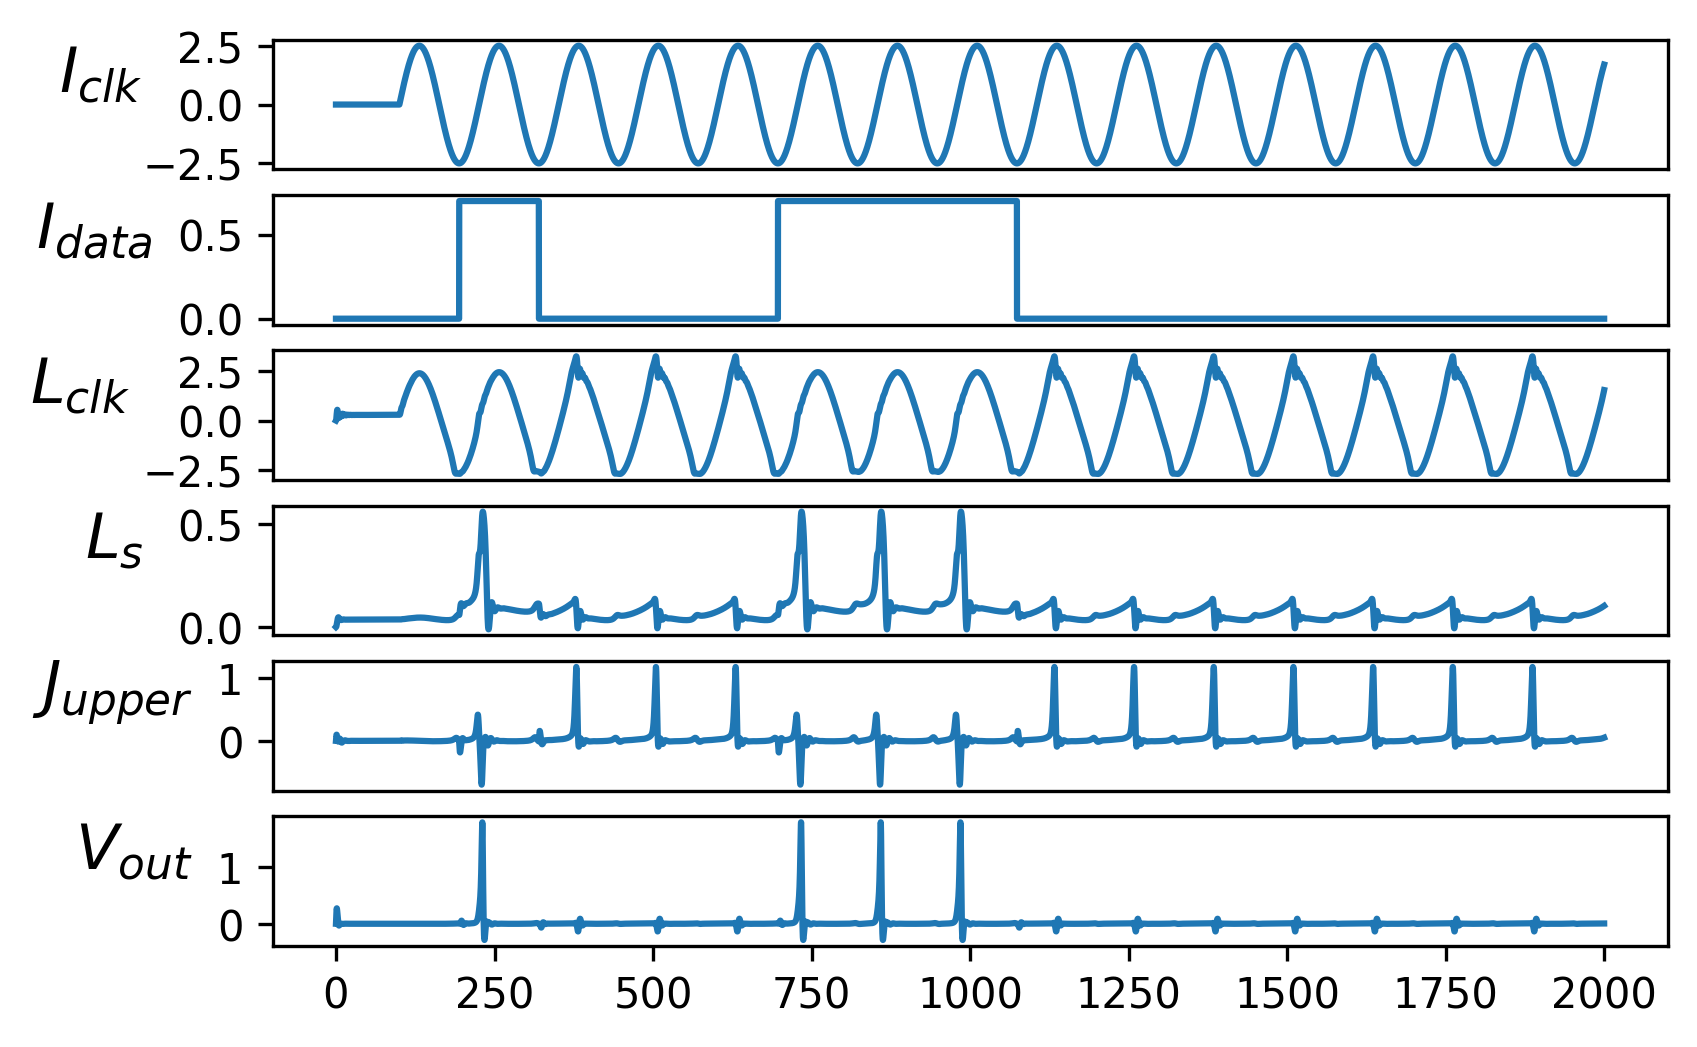

In [200]:
fig, ax = plt.subplots(nrows=6,ncols=1,dpi=300,gridspec_kw={'height_ratios': [40,40,40,40,40,40]})
# fig = plt.figure(constrained_layout=False)
# gs = fig.add_gridspec(nrows=6, ncols=1, left=0.05, right=0.48, wspace=0.05)

plt.subplot(6,1,1)
plt.ylabel('$I_{clk}$',rotation=0,fontsize=15,labelpad=10)
plt.xticks([])
# plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
#                pad = -1,    #  Расстояние между черточкой и ее подписью
#                labelsize = 9)
plt.plot(t,tact_signal.get_data("I",t,sol))

plt.subplot(6,1,2)
plt.ylabel('$I_{data}$',rotation=0,fontsize=15,labelpad=20)
plt.xticks([])
plt.plot(t,input_data_1.get_data("I",t,sol)+input_data_2.get_data("I",t,sol))

plt.subplot(6,1,3)
plt.ylabel('$L_{clk}$',rotation=0,fontsize=15,labelpad=15)
plt.xticks([])
plt.plot(t,L_clk.get_data("I",t,sol))

plt.subplot(6,1,4)
plt.ylabel('$L_{s}$',rotation=0,fontsize=15,labelpad=15)
plt.xticks([])
plt.plot(t,L_s.get_data("I",t,sol))

plt.subplot(6,1,5)
plt.ylabel('$J_{upper}$',rotation=0,fontsize=15,labelpad=25)
plt.xticks([])
plt.plot(t,J_upper.get_data("V",t,sol))

plt.subplot(6,1,6)
plt.ylabel('$V_{out}$',rotation=0,fontsize=15,labelpad=20)
plt.plot(t,J_5.get_data("V",t,sol))

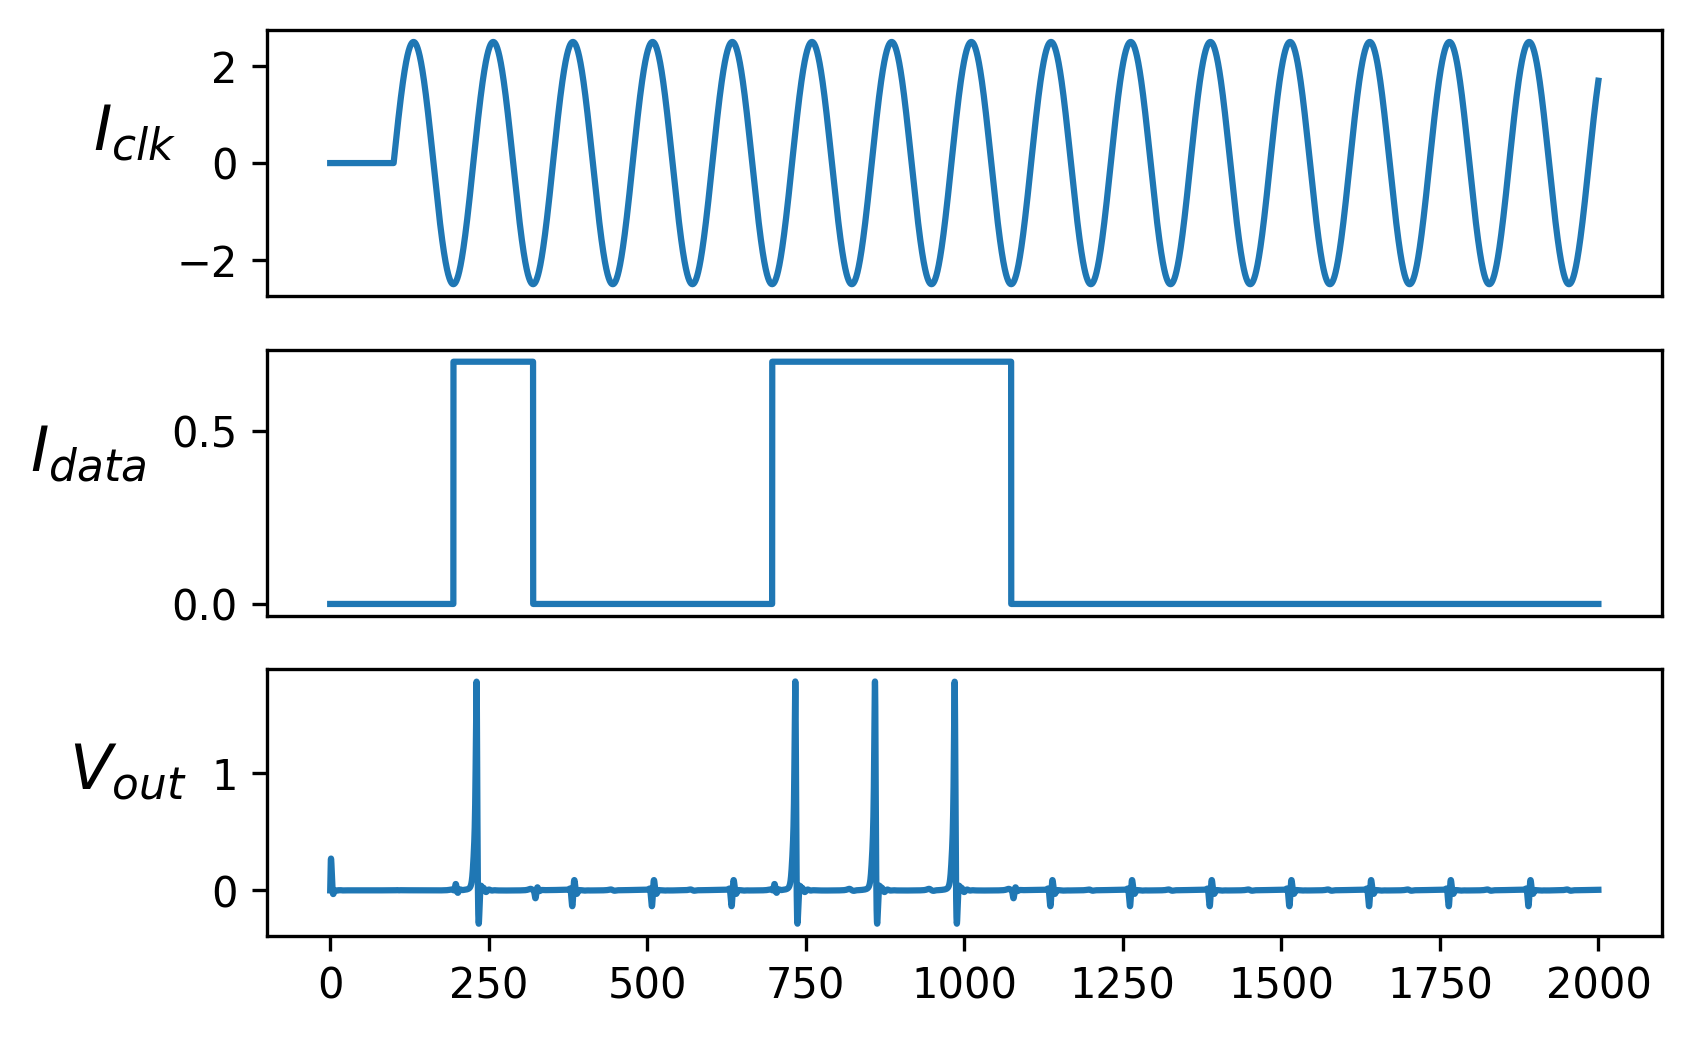

In [201]:
fig, ax = plt.subplots(nrows=3,ncols=1,dpi=300,gridspec_kw={'height_ratios': [40,40,40]})
# fig = plt.figure(constrained_layout=False)
# gs = fig.add_gridspec(nrows=6, ncols=1, left=0.05, right=0.48, wspace=0.05)

plt.subplot(3,1,1)
plt.ylabel('$I_{clk}$',rotation=0,fontsize=15,labelpad=10)
plt.xticks([])
# plt.tick_params(axis = 'both',    #  Применяем параметры к обеим осям
#                pad = -1,    #  Расстояние между черточкой и ее подписью
#                labelsize = 9)
plt.plot(t,tact_signal.get_data("I",t,sol))

plt.subplot(3,1,2)
plt.ylabel('$I_{data}$',rotation=0,fontsize=15,labelpad=20)
plt.xticks([])
plt.plot(t,input_data_1.get_data("I",t,sol)+input_data_2.get_data("I",t,sol))



plt.subplot(3,1,3)
plt.ylabel('$V_{out}$',rotation=0,fontsize=15,labelpad=20)
plt.plot(t,J_5.get_data("V",t,sol))